### Homework 3
#### Gradient Descent

In this homework we will implement a basic version of gradient descent. 

Below, look for unfinished functions that contain a line like

```
## You complete me
```

Where those occur, fill in the missing code. 

When your code is correct the output should be similar to the output provided (see the HTML version of this document for backup output images).

As in all our exercises, please be sure your function works for input that has any dimensionality (changing $d$ and $N$ should not break the code).  

Reminder:  It's cheating to google the solution and use the code you find.  Don't pollute your brain by googling.  Just try to solve the problem. 


In [94]:
import numpy as np
import matplotlib.pyplot as plt

### Here is the function you must complete
### Below you can see some tests which you can use to determine if you've succeeded.
### In your implementation simply run gradient descent for max_iter iterations.
### In other words you don't need to implement fancy stopping conditions.

def grad_descent(w,X,y,gradient,eta=0.1,max_iter=1000):
    """ parameters: w, gradient
        optional: eta (default 0.1) max_iter (default 1000)
    """
    history=[]  ## Each time a new w is considered, add it to this list
    history.append(w)
    for i in range(max_iter):
        ### You complete me
        w=w-eta*gradient(w,X,y)
        history.append(w)
    return w,np.array(history)


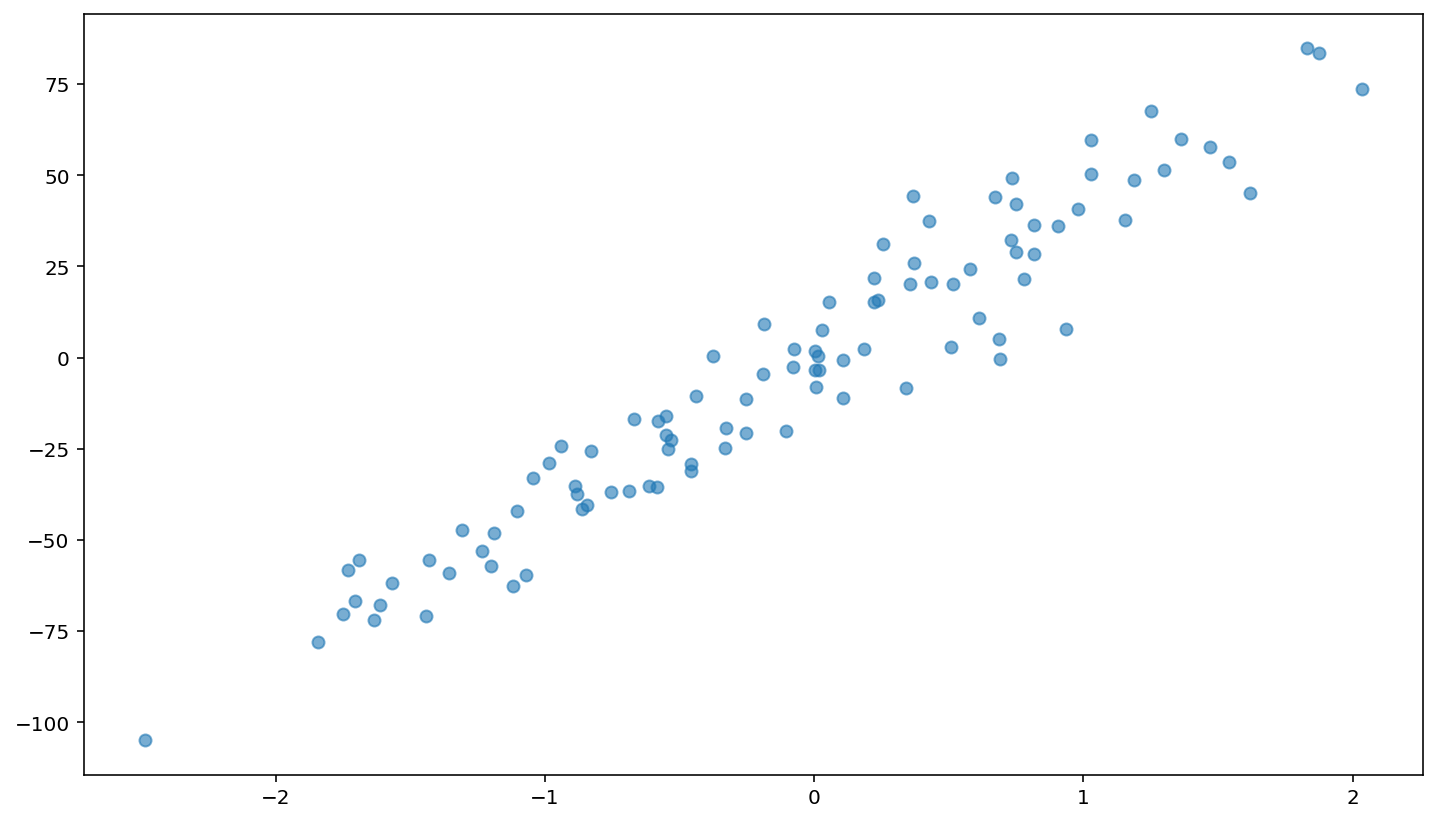

In [95]:
### First we'll try the function on a made up regression problem.

from sklearn.datasets import make_regression

X_no_bias,y = make_regression(n_features=1,noise=10,random_state=100)

plt.scatter(X_no_bias,y,alpha=0.6)
plt.show()

In [96]:
## Add a bias column
X = np.c_[np.ones(X_no_bias.shape[0]),X_no_bias]
X[:5], X.shape,y.shape

(array([[ 1.        , -0.37690335],
        [ 1.        , -1.1994512 ],
        [ 1.        , -1.74976547],
        [ 1.        ,  0.98132079],
        [ 1.        , -1.70595201]]),
 (100, 2),
 (100,))

In [97]:

## Get a train test split of the data

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)



### Linear regression with the normal equations

As we've said in class, linear regression with the normal equations is a one-liner.

Please write that line in the cell below.

You want

$$\bar{w} = X_{train}^\dagger y_{train}$$

where $X_{train}^\dagger$ is the pseudo-inverse of $X_{train}$.

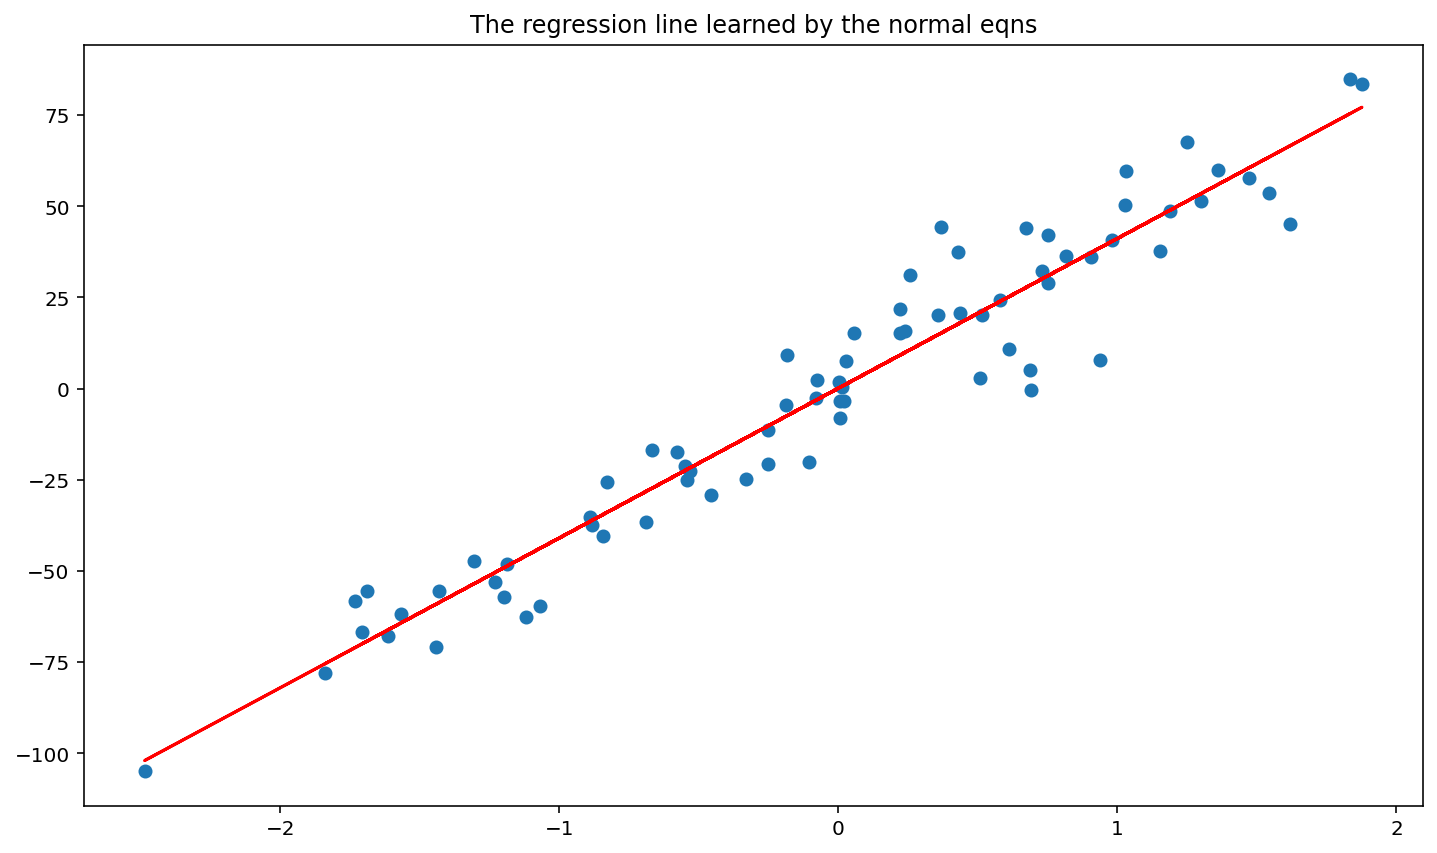

In [98]:

w = np.linalg.pinv(X_train).dot(y_train) ### You complete me

y_train_hat = X_train.dot(w)
plt.scatter(X_train[:,1],y_train)
plt.plot(X_train[:,1],y_train_hat,c='r')
plt.title("The regression line learned by the normal eqns")
plt.show()

### Assess performance

Below we use $R^2$ to assess the performance of the model.

Please help us out by implementing the `R2` function.

You can remind yourself of the definition here:

https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions




In [99]:
def R2(y,yhat):
    """parameters: y, yhat"""
    ## You complete me
    ybar = np.mean(y)
    """  SStot = np.sum((y-yhat)**2)
    SSres = np.sum((y-ybar)**2)"""
    SSres = np.sum((y-yhat)**2)
    SStot = np.sum((y-ybar)**2)
    R2= 1-(SSres/SStot)
    return R2
    #ybar = np.mean(y)
    #r2 = sum((y-yhat)**2)/sum((y-ybar)**2)
    #r2 = 1-r2
    #return r2

y_test_hat = X_test.dot(w)

print("w = {}".format(w))
print("R2 = {}".format(R2(y_test,y_test_hat)))

w = [ 0.10939422 41.06580482]
R2 = 0.9038150556357983


### Gradient Descent Optimization

Now let's try to find the solution to this same problem using gradient descent.

You'll need the gradient of the mean squared error function which is on page 85 of the textbook.

For your convenience:

$$ \nabla E_{in}(\bar{w}) = \frac{2}{N}(X^TX\bar{w}-X^Ty).$$

Remember that the computer is not psychic and will not understand "N" which is the number of rows in $X$.


In [100]:
def mse_gradient(w,X,y):
    ## You complete me
    ## This formula is given above
    N = X.shape[0]
    gradientOfMeanSquaredError= 2/N*(X.T.dot(X).dot(w)-X.T.dot(y))
    return gradientOfMeanSquaredError


In [101]:
w_init = np.random.randn(2)/10

wgd,path = grad_descent(w_init,X_train,y_train,mse_gradient)


y_test_hat = X_test.dot(wgd)

print("w (normal eqn) = {}".format(w))
print("w (gradient descent) = {}".format(wgd))
print("R2 = {}".format(R2(y_test,y_test_hat)))

w (normal eqn) = [ 0.10939422 41.06580482]
w (gradient descent) = [ 0.10939422 41.06580482]
R2 = 0.9038150556357982


In [102]:
## First 7 w's visited in grad descent
path[:7]

array([[ 0.08630898,  0.12890794],
       [-0.14041867,  8.22211369],
       [-0.27606406, 14.71398929],
       [-0.34789314, 19.9216368 ],
       [-0.37592668, 24.09931227],
       [-0.37474442, 27.45089147],
       [-0.35485799, 30.139861  ]])

In [103]:
## Last 5 w's visited

path[-5:]

array([[ 0.10939422, 41.06580482],
       [ 0.10939422, 41.06580482],
       [ 0.10939422, 41.06580482],
       [ 0.10939422, 41.06580482],
       [ 0.10939422, 41.06580482]])

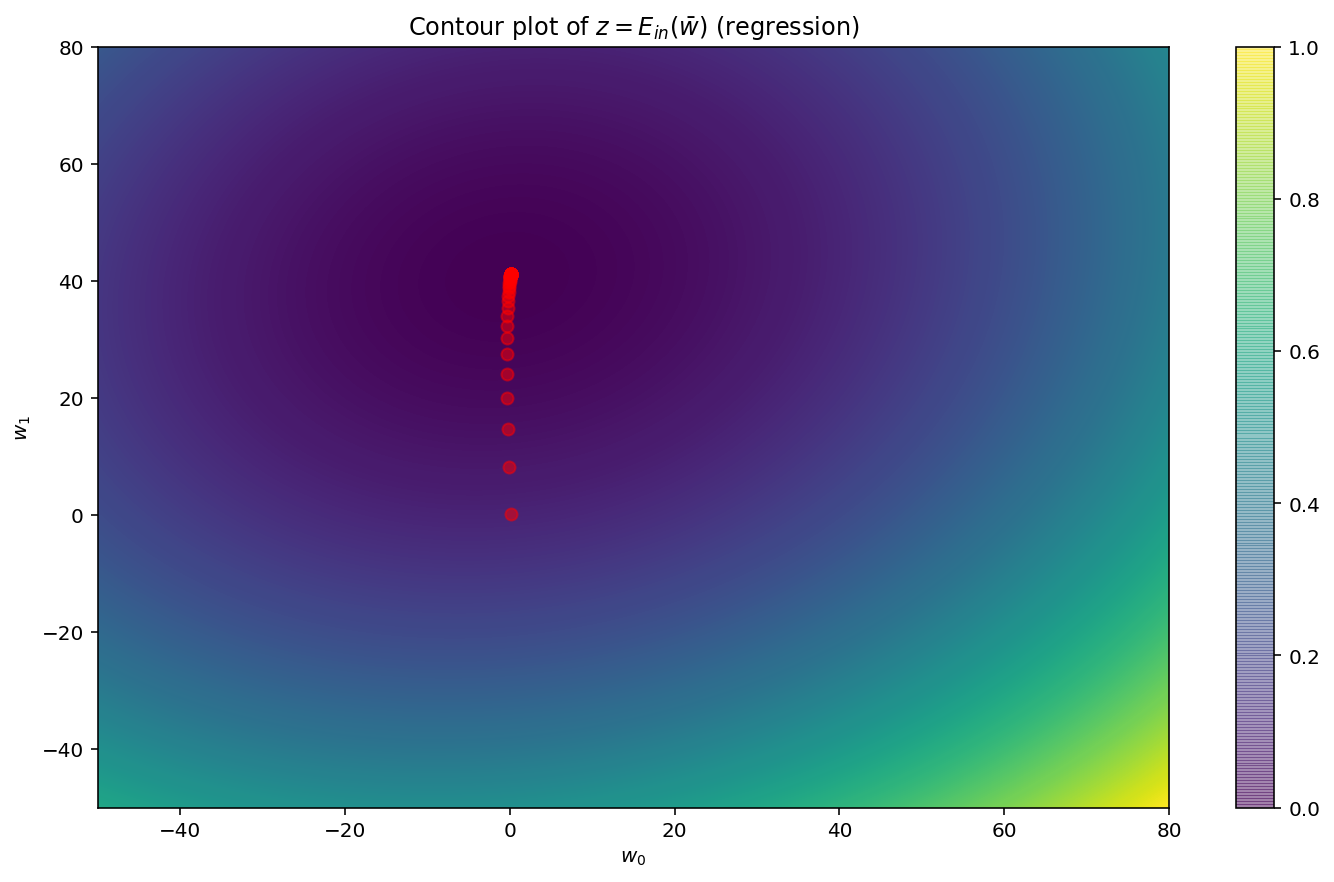

In [104]:
## This will make a picture of the path your w followed during GD

xx = np.linspace(-50,80,100)
yy = np.linspace(-50,80,100)

XX,YY = np.meshgrid(xx,yy)
W = np.c_[XX.ravel(),YY.ravel()]
errs = ((X.dot(W.T)).T - y)**2
E = np.mean(errs,axis=1)
plt.contourf(XX,YY,E.reshape(100,100),levels=300)
plt.title(r"Contour plot of $z=E_{in}(\bar{w})$ (regression)")
plt.xlabel(r"$w_0$")
plt.ylabel(r"$w_1$")
plt.scatter(path[:,0],path[:,1],c='r',alpha=0.5)
plt.colorbar()
plt.show()

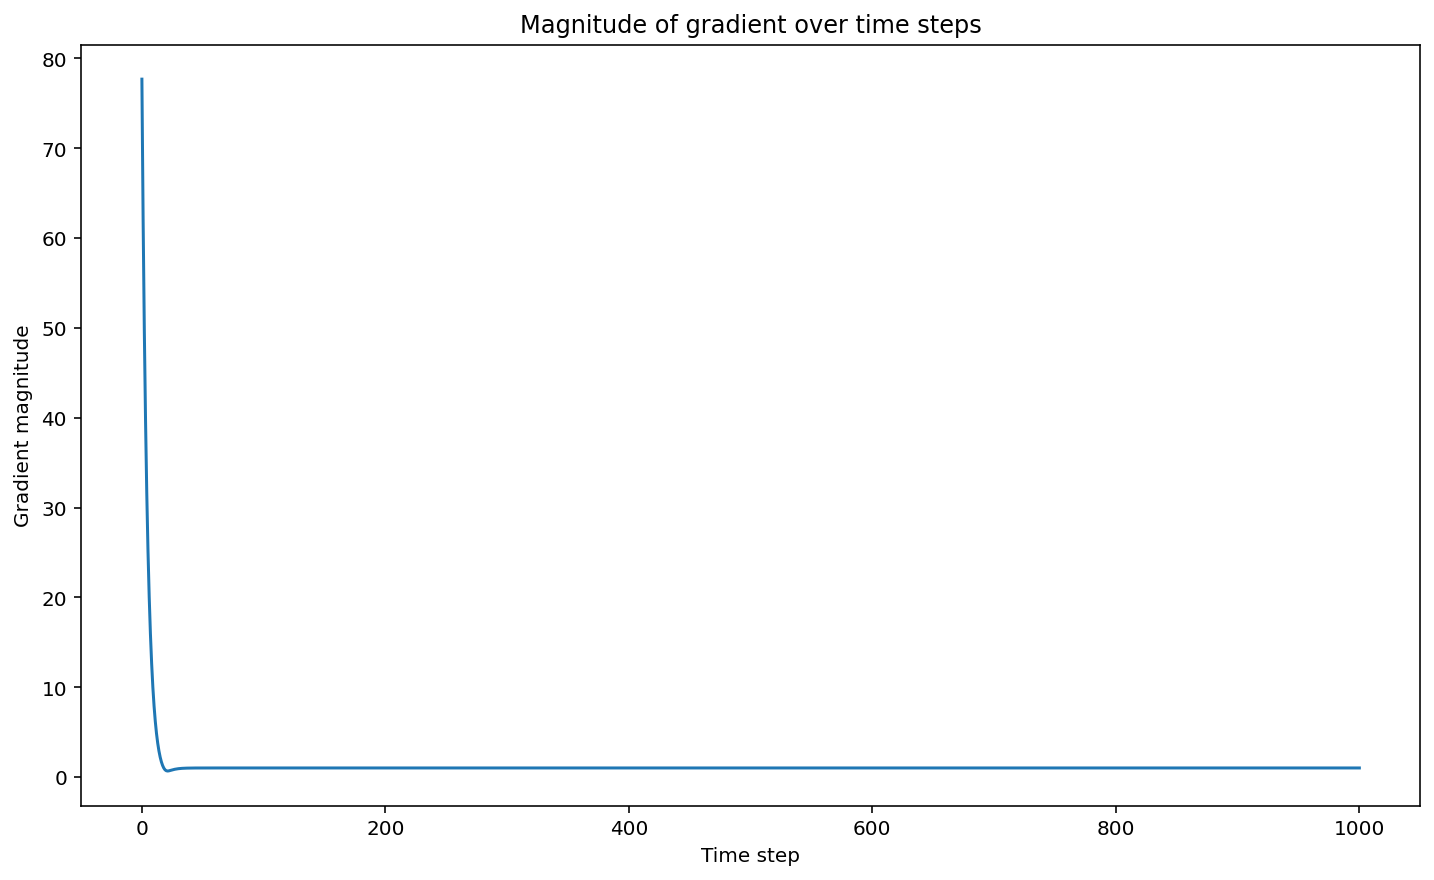

In [105]:
### This shows how the magnitude of the w your GD considered changed over time
### When could your program have stopped?

L = [mse_gradient(ww,X,y) for ww in path]
gradients = np.linalg.norm(L,axis=1)
plt.plot(np.arange(len(gradients)),gradients)
plt.title("Magnitude of gradient over time steps")
plt.ylabel("Gradient magnitude")
plt.xlabel("Time step")
plt.show()

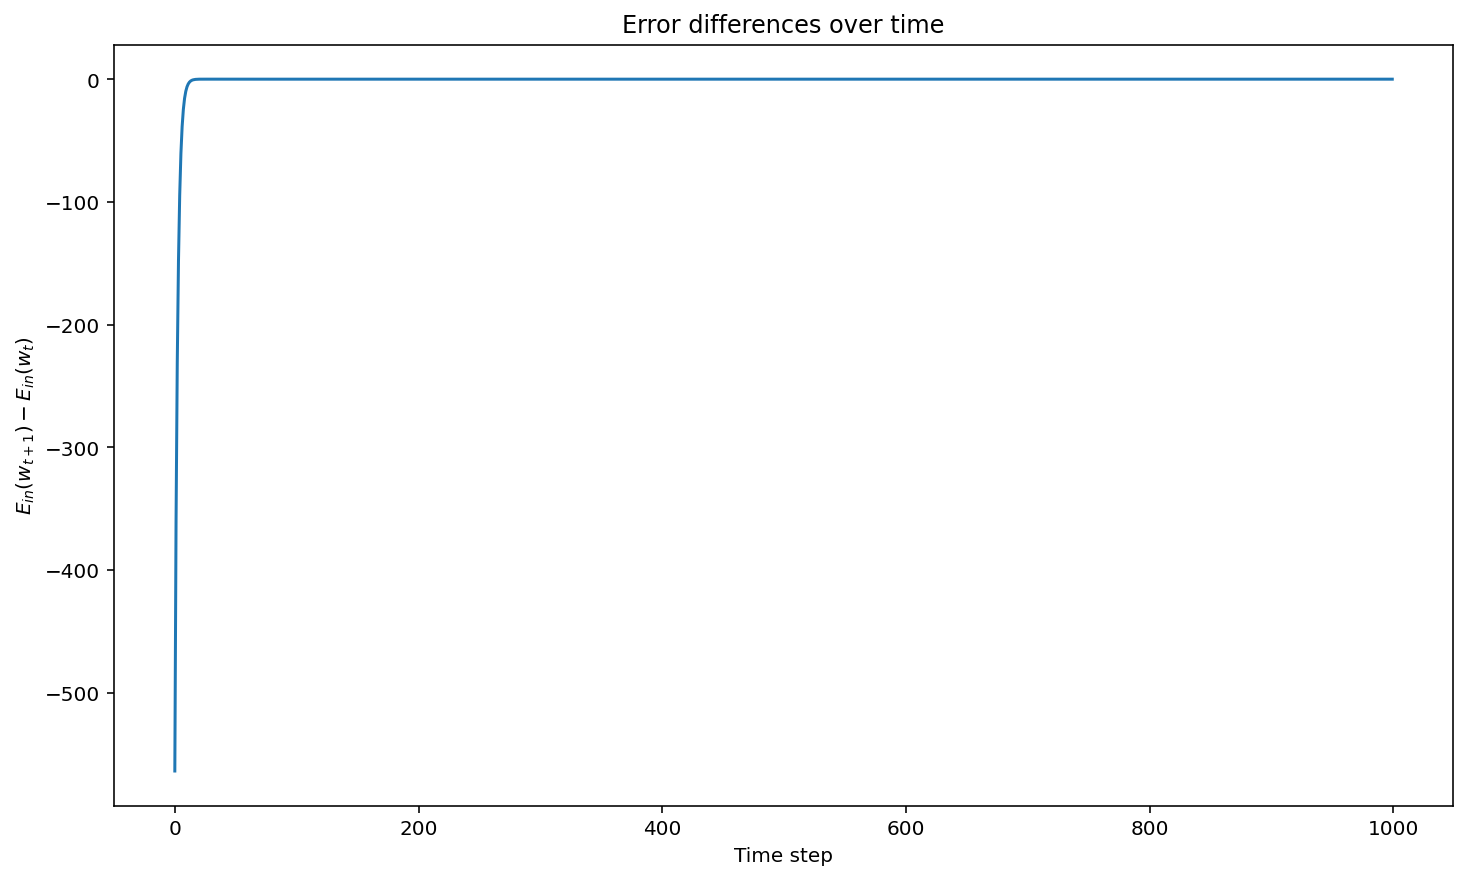

In [106]:
## This matrix version of MSE is from the bottom of pg 84 in the text
## It is 20 times faster than an implementation with python loops!

def MSE(w,X,y):
    return 1/X.shape[0]*(w.T.dot(X.T).dot(X).dot(w) - 2*w.T.dot(X.T).dot(y) + y.dot(y))

err_diffs = np.diff([MSE(ww,X,y) for ww in path])

plt.plot(np.arange(len(err_diffs)),err_diffs)
plt.title("Error differences over time")
plt.ylabel(r"$E_{in}(w_{t+1})-E_{in}(w_{t})$")
plt.xlabel("Time step")
plt.show()



### A real dataset

Let's see how your gradient descent performs on a real dataset, such as the Boston Housing data.


In [107]:
import pandas as pd
df=pd.read_csv("housing.data",header=None,delim_whitespace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Uh Oh

We ran into some problems here.

Linear regression based on the normal equations is doing just fine, but gradient descent is struggling.

We had to put $\eta$ all the way down to 0.000001 just to get convergence.

But then after 100000 iterations, we still haven't converged to a good solution.

What's the problem?

Fix it!  (Hint: What should you always do to the data before doing gradient descent? You can take the code for this operation from HW 2, or use the sklearn library version.)

When you fix it the output should look roughly like this:

```
w (normal equations )= [ 26.53112618 -10.30154035   4.11512828   2.44959865   2.11057155
  -9.36246851  17.88281394   1.23610308 -13.15196355   7.6501691
  -7.15185994  -9.86921614   3.64943825 -19.76860333]
R2 (normal equations) = 0.7165453029604523
w (gradient descent) = [ 19.9368617   -6.02022064   2.87944774   1.82739763   2.25551214
  -6.37598968  22.22541246   1.55715796  -8.46547661   4.94478739
  -4.63963461  -8.74471267   4.76136717 -18.60811081]
R2 (gradient descent)= 0.7123144123485858
```

You will need to put $\eta$ and `max_iter` back down to sane values to get this output.

In [108]:
X_nb = df.values[:,:-1]
y = df.values[:,-1]
X = np.concatenate((np.ones(X_nb.shape[0]).reshape(X_nb.shape[0],1),X_nb),axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y)
w = np.linalg.pinv(X_train).dot(y_train)
y_train_hat = X_train.dot(w)
y_test_hat = X_test.dot(w)

print("w (normal equations )= {}".format(w))
print("R2 (normal equations) = {}".format(R2(y_test,y_test_hat)))
w_init = np.random.randn(X.shape[1])

wgd,path = grad_descent(w_init,X_train,y_train,mse_gradient,eta=0.000001,max_iter=100000)

y_test_hat = X_test.dot(wgd)

print("w (gradient descent) = {}".format(wgd))
print("R2 (gradient descent)= {}".format(R2(y_test,y_test_hat)))

w (normal equations )= [ 2.68889211e+01 -1.05020682e-01  4.19079039e-02 -4.16278308e-02
  2.17861434e+00 -1.23446232e+01  4.57907475e+00 -2.64765372e-02
 -1.37543555e+00  2.10872234e-01 -1.25262409e-02 -8.22507430e-01
  9.05634346e-03 -3.35279216e-01]
R2 (normal equations) = 0.5837035675846445


w (gradient descent) = [ 0.54360954 -0.09014226  0.08978069 -0.07935464  0.37381637 -1.39600309
  2.37953346  0.05826803 -0.22972299  0.07749059 -0.0062087   0.2970127
  0.0215568  -0.54984907]
R2 (gradient descent)= 0.48382794384544336


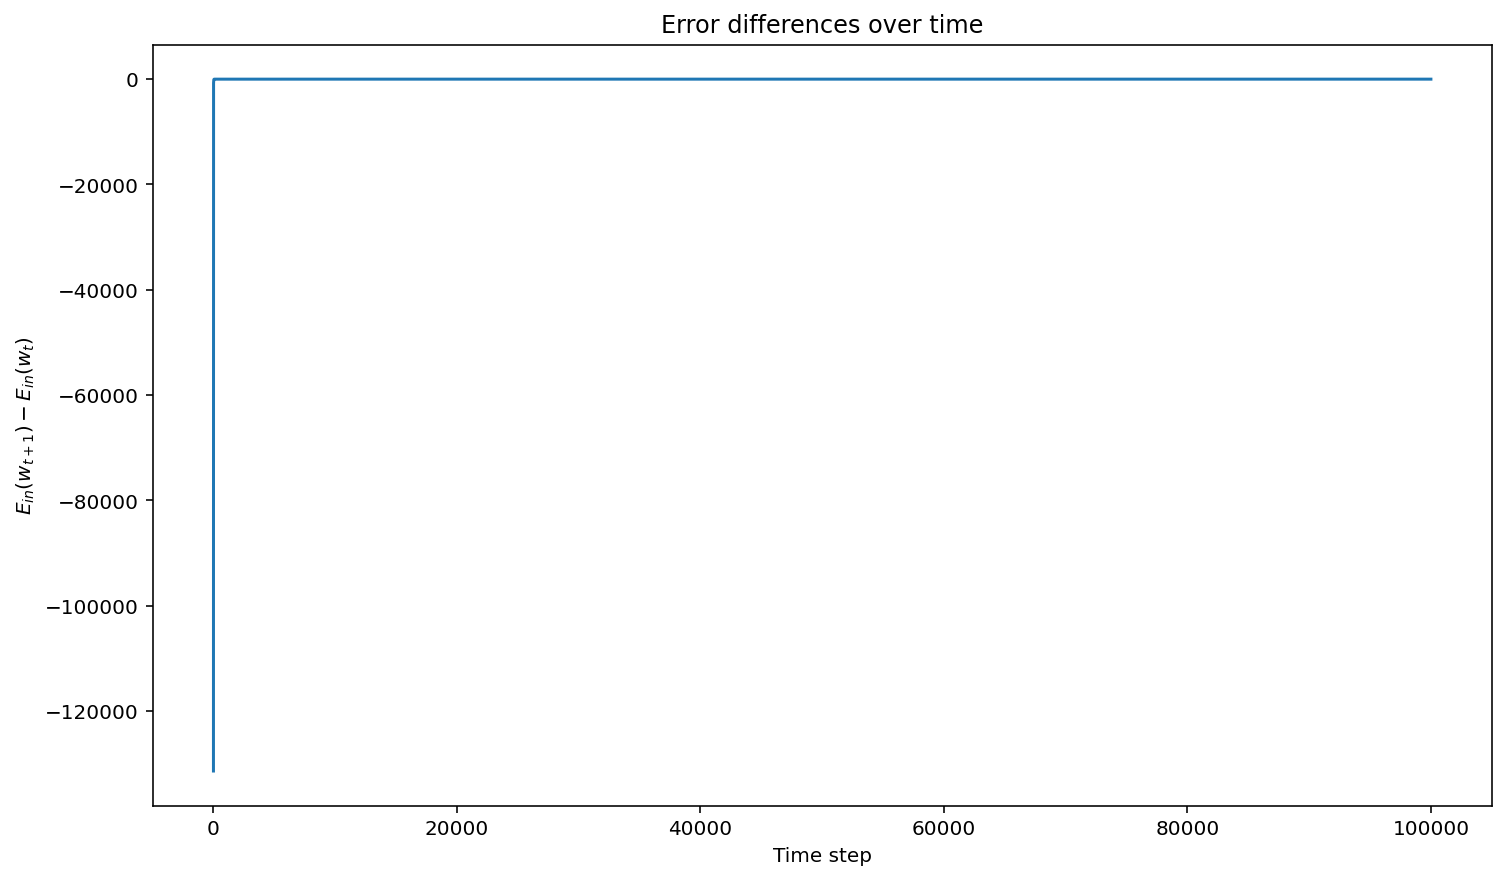

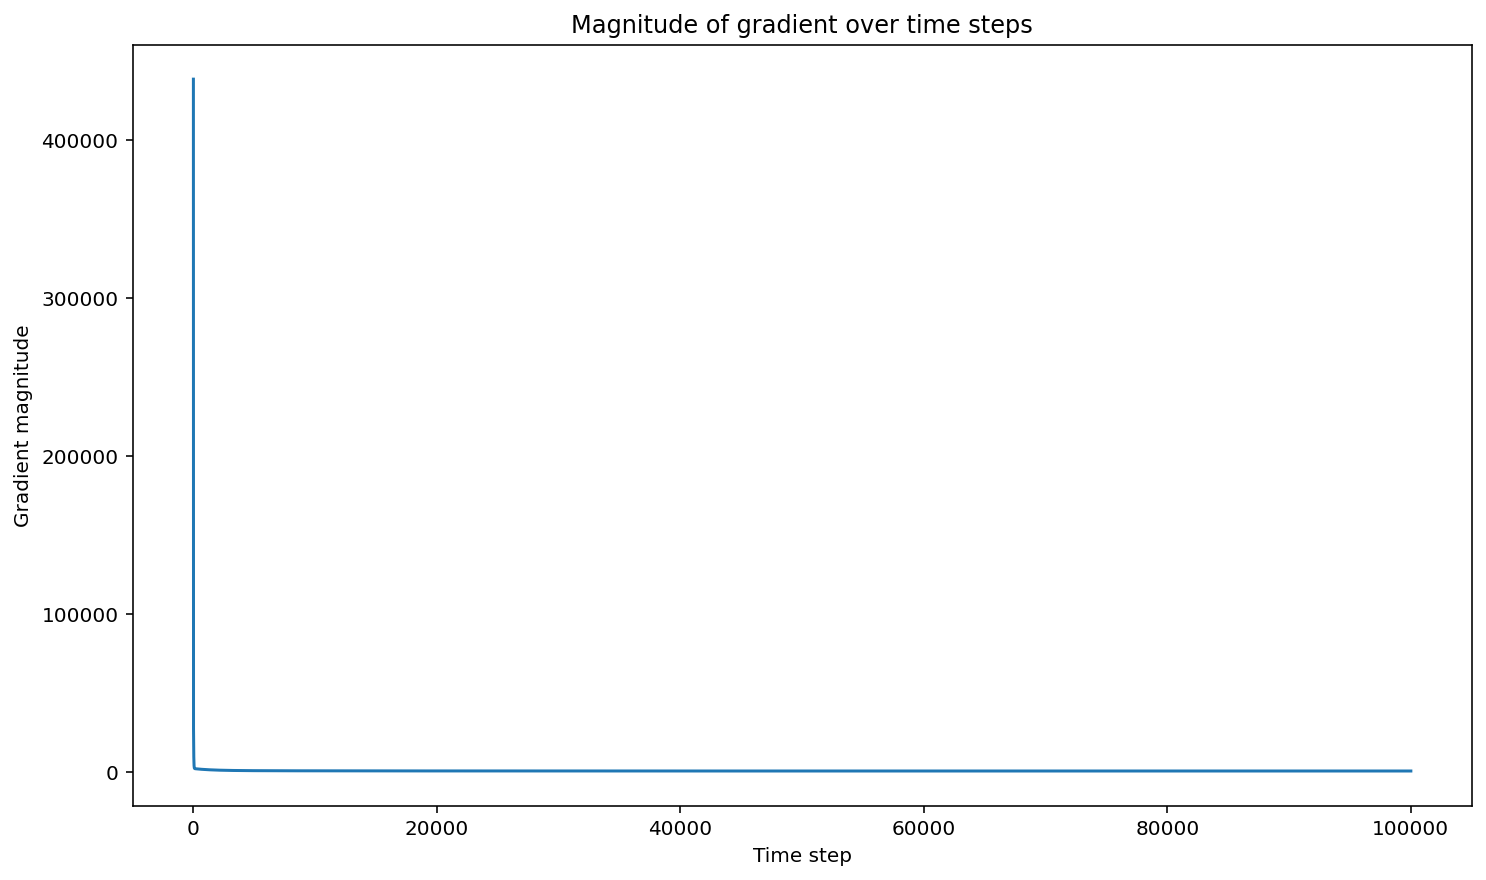

In [109]:
err_diffs = np.diff([MSE(ww,X,y) for ww in path])

plt.plot(np.arange(len(err_diffs)),err_diffs)
plt.title("Error differences over time")
plt.ylabel(r"$E_{in}(w_{t+1})-E_{in}(w_{t})$")
plt.xlabel("Time step")
plt.show()

L = [mse_gradient(ww,X,y) for ww in path]
gradients = np.linalg.norm(L,axis=1)
plt.plot(np.arange(len(gradients)),gradients)
plt.title("Magnitude of gradient over time steps")
plt.ylabel("Gradient magnitude")
plt.xlabel("Time step")
plt.show()



In [110]:
err_diffs[-10:]

array([-3.11224796e-05, -3.11220616e-05, -3.11216415e-05, -3.11212224e-05,
       -3.11208034e-05, -3.11203845e-05, -3.11199658e-05, -3.11195465e-05,
       -3.11191277e-05, -3.11187087e-05])

In [111]:
gradients[-10:]

array([332.99482175, 332.9949491 , 332.99507645, 332.9952038 ,
       332.99533115, 332.9954585 , 332.99558584, 332.99571319,
       332.99584054, 332.99596788])

In [112]:
def minmax(X):
    mins = np.min(X,axis=0)
    maxs = np.max(X,axis=0)
    bias = np.allclose(X[:,0],np.ones(X.shape[0]))  ## Is there a bias column?
    if bias:  ## Without this max=min, causes divide-by-zero
        maxs[0]=1
        mins[0]=0
    return mins,maxs

def minmax_apply(X,mins,maxs):
    return (X-mins)/(maxs-mins)

mins,maxs = minmax(X_train)
X_train = minmax_apply(X_train,mins,maxs)
X_test = minmax_apply(X_test,mins,maxs)


In [113]:
def pw_linreg_grad(x,w,yy):
    """parameters: x,w,yy  (instance, weight vector, truth value = +-1)
       return:  new w
       This is the gradient for MSE error.
       The mathematical formula can be found above.
       w = (np.linalg.pinv(X_train).dot(y_train))
       w=w-eta*gradient(w,X,y)
    """
    return 2*(w.T.dot(x)-yy)*x

def sgd(w,X,y,pw_gradient,eta=0.05,num_epochs=50):
    """parameters: w (initial weight vector)
                   X (data matrix)
                   y (target vector)
                   pw_gradient (pointwise gradient function taking params x,w,yy)"""
    history = [] ## Every time you compute a new w, do history.append(w).
    for j in range(num_epochs):
        shuff = np.random.permutation(X.shape[0])
        Xs = X[shuff]
        ys = y[shuff]
        for i in range(X.shape[0]):
            history.append(w)
            #You complete me
            x = Xs[i]
            yy = ys[i]
            w=w-eta*pw_gradient(x,w,yy)
    return w,np.array(history)

### Stochastic Gradient Descent

In this section you will implement stochastic gradient descent and apply it so some real data.



In [114]:
### Be sure X_train and X_test are already scaled for this test.
### Actual R2 scores will vary but the normal eqns and sgd should give similar results.

w = np.linalg.pinv(X_train).dot(y_train)
yhat_test_ne = X_test.dot(w)
print("Solution from normal equations: \n",w)
print("R2_test(w) (normal equations) = {}".format(R2(yhat_test_ne,y_test)))

wsgd = np.random.randn(X.shape[1])
wsgd,path = sgd(wsgd,X_train,y_train,pw_linreg_grad,eta=0.01,num_epochs=300)
print("Solution from SGD")
yhat_test = X_test.dot(wsgd)
print("w = {},\n R2_test(w) (sgd) = {}".format(wsgd,R2(yhat_test,y_test)))

Solution from normal equations: 
 [ 23.6146529   -9.34367746   4.19079039  -1.13560723   2.17861434
  -5.99948687  23.89819114  -2.57087176 -15.06418274   4.85006137
  -6.56375022  -7.73156984   3.57164073 -11.75488933]
R2_test(w) (normal equations) = 0.17835101779501605


Solution from SGD
w = [ 23.56248272  -9.38451918   4.07895924  -1.13766859   2.16953781
  -5.92372681  23.81784098  -2.45071077 -14.99766162   4.8844509
  -6.61898303  -7.59473035   3.51613441 -11.59465804],
 R2_test(w) (sgd) = 0.16474811345691542


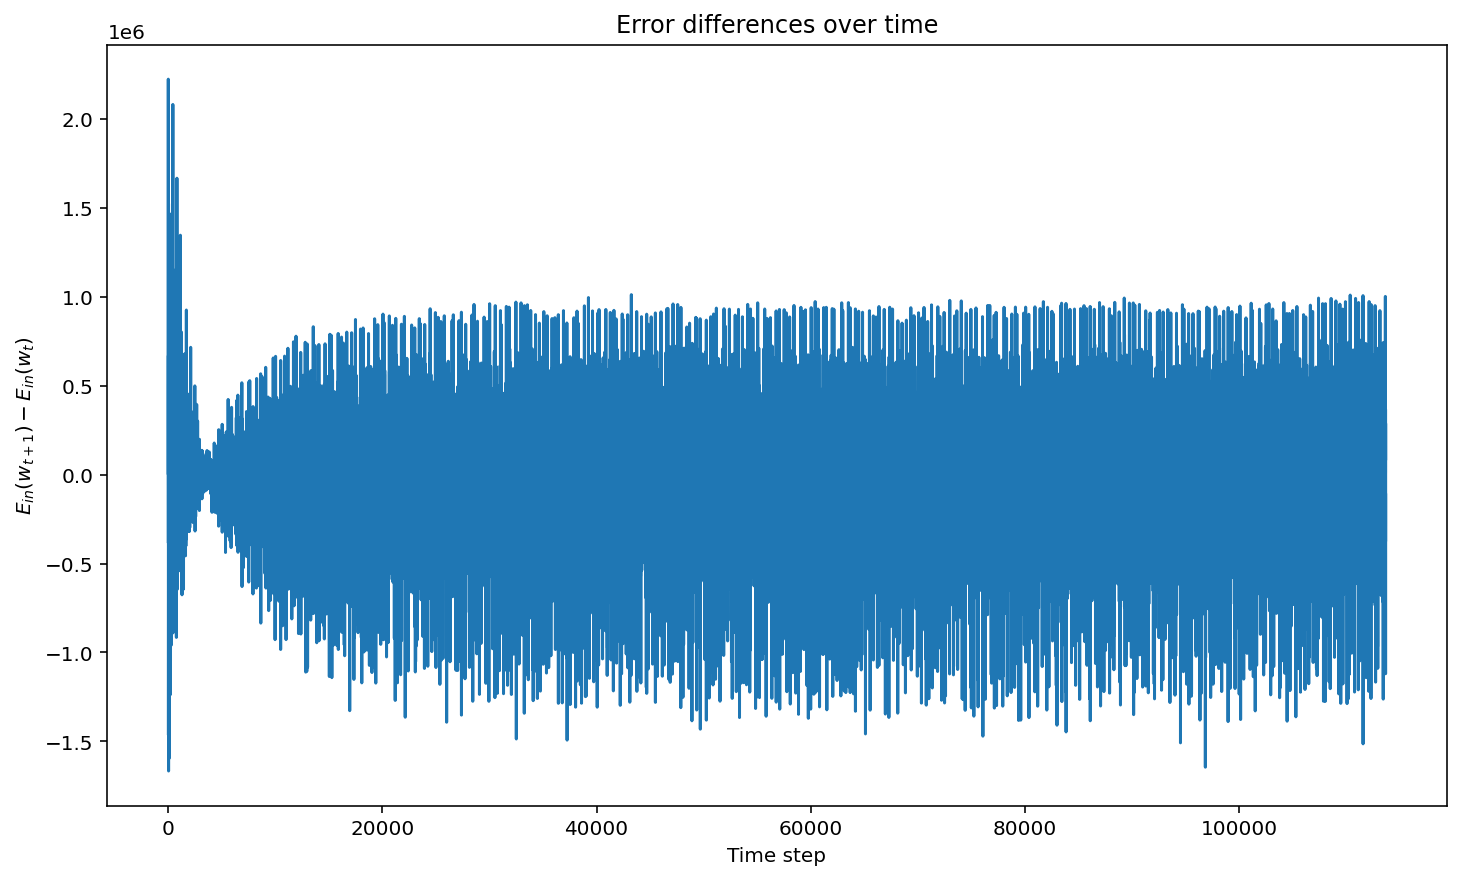

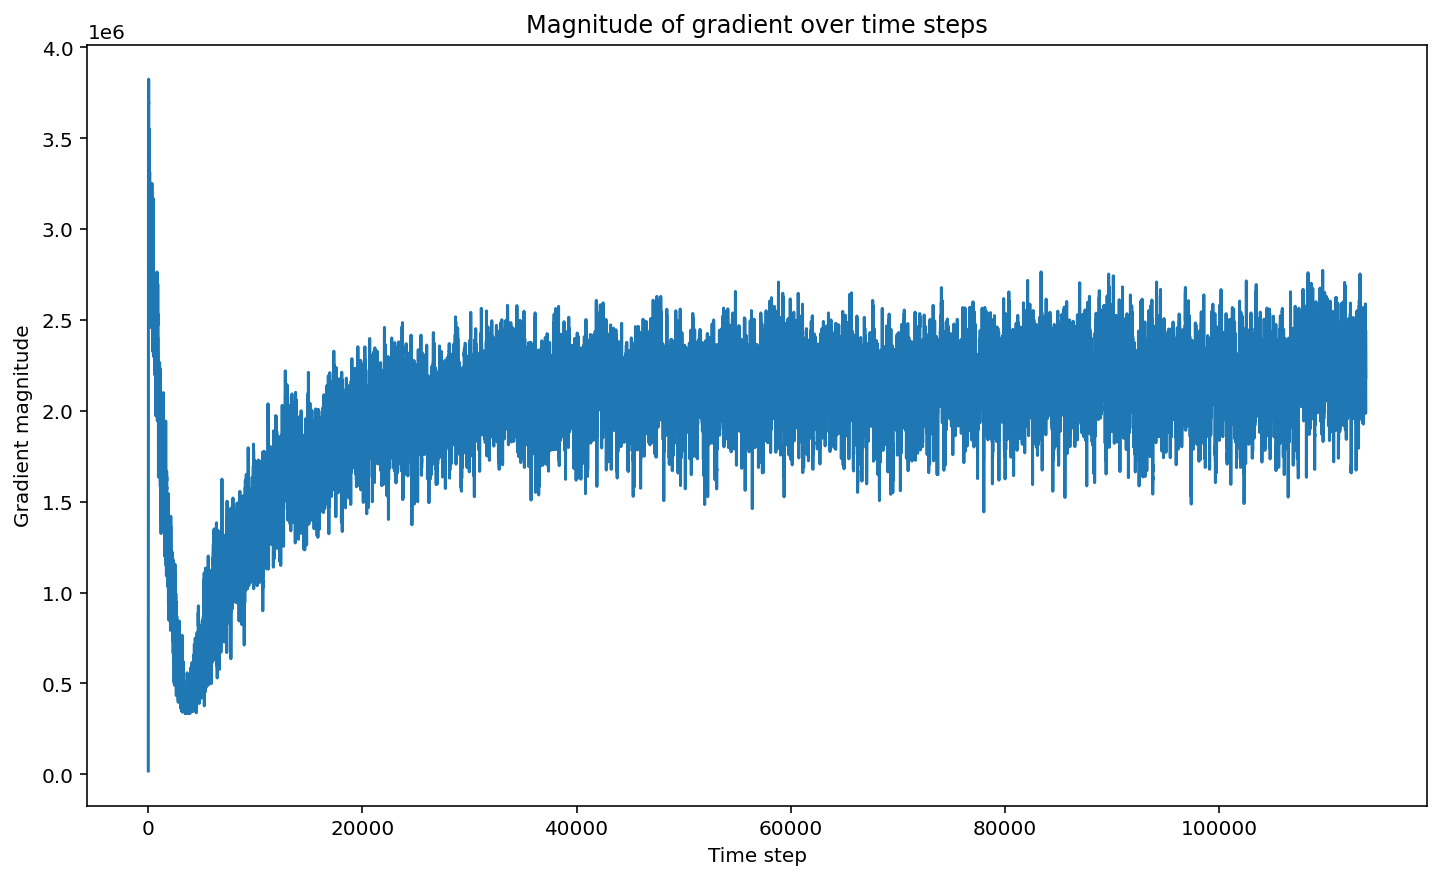

In [115]:
err_diffs = np.diff([MSE(ww,X,y) for ww in path])

plt.plot(np.arange(len(err_diffs)),err_diffs)
plt.title("Error differences over time")
plt.ylabel(r"$E_{in}(w_{t+1})-E_{in}(w_{t})$")
plt.xlabel("Time step")
plt.show()

L = [mse_gradient(ww,X,y) for ww in path]
gradients = np.linalg.norm(L,axis=1)
plt.plot(np.arange(len(gradients)),gradients)
plt.title("Magnitude of gradient over time steps")
plt.ylabel("Gradient magnitude")
plt.xlabel("Time step")
plt.show()